In [2]:
# # Libraries
# from nilearn import datasets
# # from nideconv.utils import roi
# import pandas as pd
# from nilearn import plotting
# import nibabel as nib

# import matplotlib.pyplot as plt


In [3]:

coReg='/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_coReg2atlas_flirt.nii.gz'
# Locate the data of the first subject
func = '/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
#template used 
template='/home/mina94/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_T1w.nii.gz'
#'/home/mina94/projects/rrg-glatard/mina94/tryfuzzy/output/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_desc-coreg_boldref.nii.gz'
#sub-126BPCP021001_ses-1_task-rest_space-MNI152NLin2009cAsym_boldref.nii.gz'
# ... and confounds extracted by fmriprep
confounds_fn = '/home/mina94/scratch/fixSeed_threads/fmriprep_mca-output/iter_1/sub-126BPCP021001/ses-1/func/sub-126BPCP021001_ses-1_task-rest_desc-confounds_timeseries.tsv'
# We need to load the confounds and fill nas
confounds = pd.read_table(confounds_fn).fillna(method='bfill')
# atlas='/home/mina94/.cache/templateflow/tpl-MNI152NLin2009cAsym/tpl-MNI152NLin2009cAsym_res-01_atlas-Schaefer2018_desc-100Parcels17Networks_dseg.nii.gz'

/tmp/ipykernel_2082664/2366041141.py:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  confounds = pd.read_table(confounds_fn).fillna(method='bfill')


In [4]:
img=nib.load(coReg)

In [5]:
# We only want to include a subset of confounds
confounds_to_include = ['global_signal', 'csf',
                        'white_matter', 'trans_x', 'trans_y',
                        'trans_z', 'rot_x', 'rot_y', 'rot_z', 'trans_x_power2',
                        'trans_y_power2', 'trans_z_power2', 'rot_x_power2', 'rot_y_power2', 'rot_z_power2']
confounds = confounds[confounds_to_include]



In [6]:
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7)
atlas

{'maps': '/home/mina94/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_1mm.nii.gz',
 'labels': array([b'7Networks_LH_Vis_1', b'7Networks_LH_Vis_2',
        b'7Networks_LH_Vis_3', b'7Networks_LH_Vis_4',
        b'7Networks_LH_Vis_5', b'7Networks_LH_Vis_6',
        b'7Networks_LH_Vis_7', b'7Networks_LH_Vis_8',
        b'7Networks_LH_Vis_9', b'7Networks_LH_SomMot_1',
        b'7Networks_LH_SomMot_2', b'7Networks_LH_SomMot_3',
        b'7Networks_LH_SomMot_4', b'7Networks_LH_SomMot_5',
        b'7Networks_LH_SomMot_6', b'7Networks_LH_DorsAttn_Post_1',
        b'7Networks_LH_DorsAttn_Post_2', b'7Networks_LH_DorsAttn_Post_3',
        b'7Networks_LH_DorsAttn_Post_4', b'7Networks_LH_DorsAttn_Post_5',
        b'7Networks_LH_DorsAttn_Post_6', b'7Networks_LH_DorsAttn_PrCv_1',
        b'7Networks_LH_DorsAttn_FEF_1',
        b'7Networks_LH_SalVentAttn_ParOper_1',
        b'7Networks_LH_SalVentAttn_FrOperIns_1',
        b'7Networks_LH_SalVentAttn_FrOperIns_2',
        b'

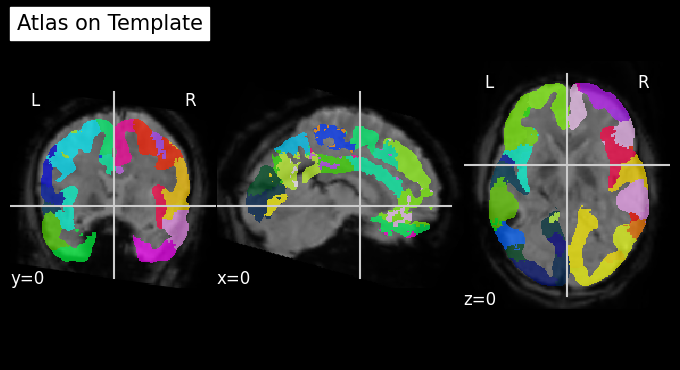

In [7]:
template_img=nib.load(coReg)
# Load your atlas
#atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr50-2mm')
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=100, yeo_networks=7)

# Display the atlas overlaid on the template
plotting.plot_roi(atlas.maps, bg_img=template_img, title="Atlas on Template", display_mode='ortho', cut_coords=(0, 0, 0))
plotting.show()

In [8]:
atlas_img=nib.load(atlas.maps)
atlas_img
# Save the new NIfTI image to a file
new_image_path = '/home/mina94/scratch/fixSeed_threads/atlas.nii.gz'
atlas_img.to_filename(new_image_path)

In [9]:
from nilearn.image import resample_to_img
from sklearn.metrics import jaccard_score

# Resample atlas to template
# atlas_resampled = resample_to_img(atlas.maps, coReg)

# Load data from both images
atlas_data = atlas_img.get_fdata().astype(bool).flatten()
template_data = (template_img.get_fdata() > 0).astype(bool).flatten()  # Assuming template is binary

# Calculate Jaccard similarity index (equivalent to Dice coefficient for binary data)
overlap = jaccard_score(atlas_data, template_data)
print(f'Dice Coefficient: {2 * overlap / (1 + overlap)}')


Dice Coefficient: 0.3147569811702167


In [10]:
import nilearn
from nilearn import datasets
from nilearn.input_data import NiftiLabelsMasker

In [11]:
atlas.labels=atlas.labels.tolist()
atlas_labels = [label.decode('utf-8') for label in atlas.labels]
atlas_labels

['7Networks_LH_Vis_1',
 '7Networks_LH_Vis_2',
 '7Networks_LH_Vis_3',
 '7Networks_LH_Vis_4',
 '7Networks_LH_Vis_5',
 '7Networks_LH_Vis_6',
 '7Networks_LH_Vis_7',
 '7Networks_LH_Vis_8',
 '7Networks_LH_Vis_9',
 '7Networks_LH_SomMot_1',
 '7Networks_LH_SomMot_2',
 '7Networks_LH_SomMot_3',
 '7Networks_LH_SomMot_4',
 '7Networks_LH_SomMot_5',
 '7Networks_LH_SomMot_6',
 '7Networks_LH_DorsAttn_Post_1',
 '7Networks_LH_DorsAttn_Post_2',
 '7Networks_LH_DorsAttn_Post_3',
 '7Networks_LH_DorsAttn_Post_4',
 '7Networks_LH_DorsAttn_Post_5',
 '7Networks_LH_DorsAttn_Post_6',
 '7Networks_LH_DorsAttn_PrCv_1',
 '7Networks_LH_DorsAttn_FEF_1',
 '7Networks_LH_SalVentAttn_ParOper_1',
 '7Networks_LH_SalVentAttn_FrOperIns_1',
 '7Networks_LH_SalVentAttn_FrOperIns_2',
 '7Networks_LH_SalVentAttn_PFCl_1',
 '7Networks_LH_SalVentAttn_Med_1',
 '7Networks_LH_SalVentAttn_Med_2',
 '7Networks_LH_SalVentAttn_Med_3',
 '7Networks_LH_Limbic_OFC_1',
 '7Networks_LH_Limbic_TempPole_1',
 '7Networks_LH_Limbic_TempPole_2',
 '7Networks_

In [12]:
atlas_filename=atlas.maps

In [15]:
fmri_img=nib.load(func)
# Initialize the NiftiLabelsMasker with some standard options for preprocessing
masker = NiftiLabelsMasker(labels_img =atlas_filename, standardize=True, smoothing_fwhm=6,memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(fmri_img)


[NiftiLabelsMasker.wrapped] loading data from /home/mina94/nilearn_data/schaefer_2018/Schaefer2018_100Parcels_7Networks_order_FSLMNI152_1mm.nii.gz
Resampling labels
[Memory]1.3s, 0.0min    : Loading _filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


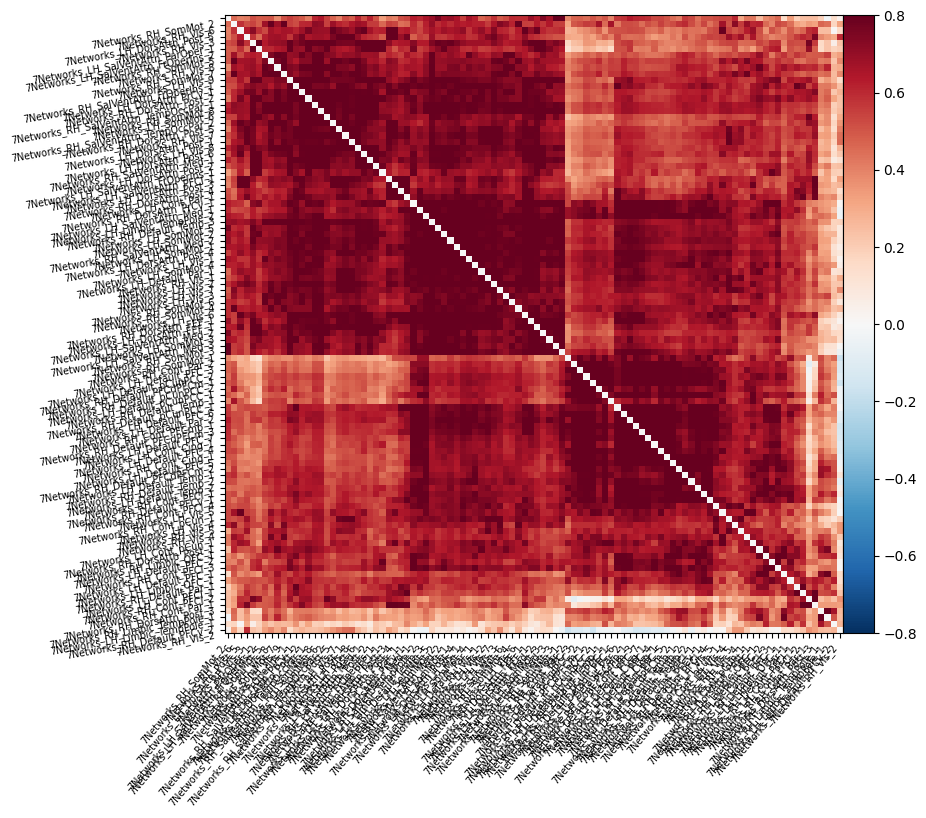

In [16]:
from nilearn.connectome import ConnectivityMeasure
import numpy as np
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

# Plot correlation matrix - note: matrix is ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(8,8), labels=atlas_labels,
                     vmax=0.8, vmin=-0.8, reorder=True);

In [14]:
# Print all labels to find indices
for i, label in enumerate(atlas_labels):
    print(i, label)

# Specify the indices of your regions of interest
roi_indices = [0, 10, 20]  # Example indices of ROIs
roi_labels = [atlas_labels[i] for i in roi_indices]
print("Selected ROIs:", roi_labels)

0 7Networks_LH_Vis_1
1 7Networks_LH_Vis_2
2 7Networks_LH_Vis_3
3 7Networks_LH_Vis_4
4 7Networks_LH_Vis_5
5 7Networks_LH_Vis_6
6 7Networks_LH_Vis_7
7 7Networks_LH_Vis_8
8 7Networks_LH_Vis_9
9 7Networks_LH_SomMot_1
10 7Networks_LH_SomMot_2
11 7Networks_LH_SomMot_3
12 7Networks_LH_SomMot_4
13 7Networks_LH_SomMot_5
14 7Networks_LH_SomMot_6
15 7Networks_LH_DorsAttn_Post_1
16 7Networks_LH_DorsAttn_Post_2
17 7Networks_LH_DorsAttn_Post_3
18 7Networks_LH_DorsAttn_Post_4
19 7Networks_LH_DorsAttn_Post_5
20 7Networks_LH_DorsAttn_Post_6
21 7Networks_LH_DorsAttn_PrCv_1
22 7Networks_LH_DorsAttn_FEF_1
23 7Networks_LH_SalVentAttn_ParOper_1
24 7Networks_LH_SalVentAttn_FrOperIns_1
25 7Networks_LH_SalVentAttn_FrOperIns_2
26 7Networks_LH_SalVentAttn_PFCl_1
27 7Networks_LH_SalVentAttn_Med_1
28 7Networks_LH_SalVentAttn_Med_2
29 7Networks_LH_SalVentAttn_Med_3
30 7Networks_LH_Limbic_OFC_1
31 7Networks_LH_Limbic_TempPole_1
32 7Networks_LH_Limbic_TempPole_2
33 7Networks_LH_Cont_Par_1
34 7Networks_LH_Cont_PFCl_1


In [15]:
print(type(time_series))
print(time_series.shape)

<class 'numpy.ndarray'>
(420, 100)


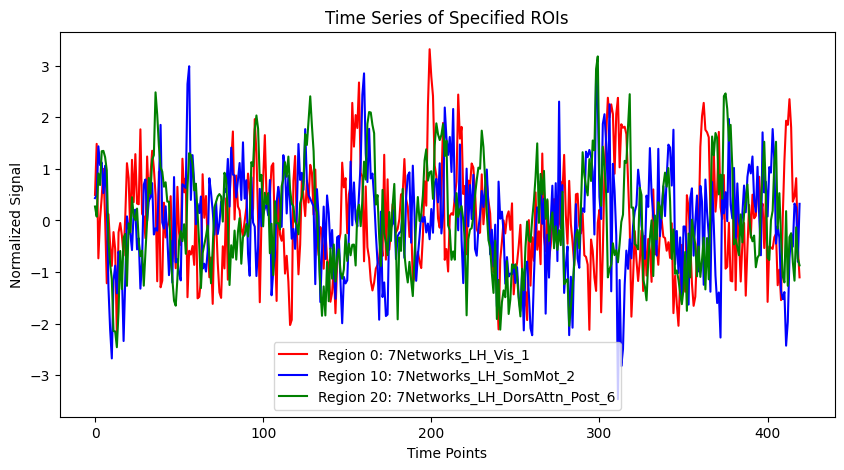

In [16]:
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'green']

# Plotting the time series of the specified regions
plt.figure(figsize=(10, 5))
# print(time_series.shape)
for i, ts in enumerate(roi_indices):
    # print(i)
    # print(len(roi_indices))
    # print(roi_indices[i], roi_labels[i])
    color = colors[i % len(colors)]
    plt.plot(time_series.T[ts], label=f'Region {roi_indices[i]}: {roi_labels[i]}', color=color)
plt.title('Time Series of Specified ROIs')
plt.xlabel('Time Points')
plt.ylabel('Normalized Signal')
plt.legend()
plt.show()


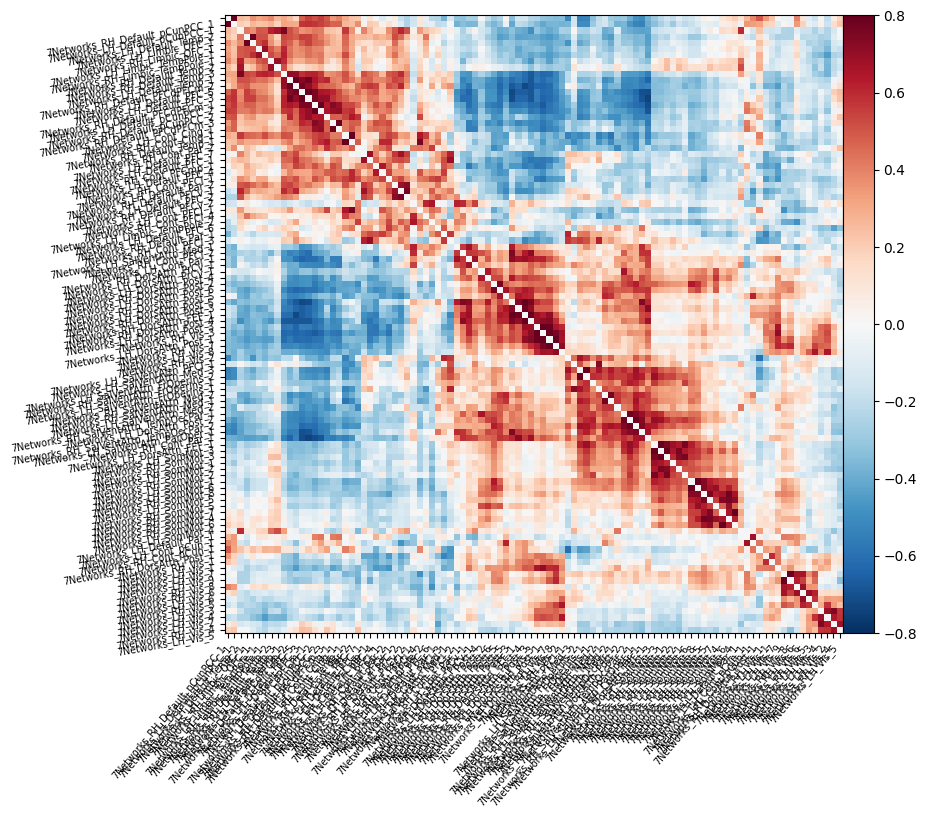

In [17]:
from nilearn.connectome import ConnectivityMeasure
import numpy as np
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

# Plot correlation matrix - note: matrix is ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(8,8), labels=atlas_labels,
                     vmax=0.8, vmin=-0.8, reorder=True);

In [18]:
import glob
import seaborn as sns
# Network Libraries
import networkx as nx
from nxviz import CircosPlot
import community


/lustre06/project/6049200/mina94/.venv/lib/python3.11/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.4 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.4, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [19]:
G = nx.Graph()
print('shape of correlation matrix: ', correlation_matrix.shape)
# Add nodes to the graph
num_nodes = correlation_matrix.shape[0]
G.add_nodes_from(range(num_nodes))
print(f"Graph G with {num_nodes} nodes was built")


shape of correlation matrix:  (100, 100)
Graph G with 100 nodes was built


In [20]:
# Add edges based on correlation matrix
threshold = 0.05  # Adjust this threshold as needed
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        correlation = correlation_matrix[i, j]
        if abs(correlation) >= threshold:
            G.add_edge(i, j, weight=correlation)


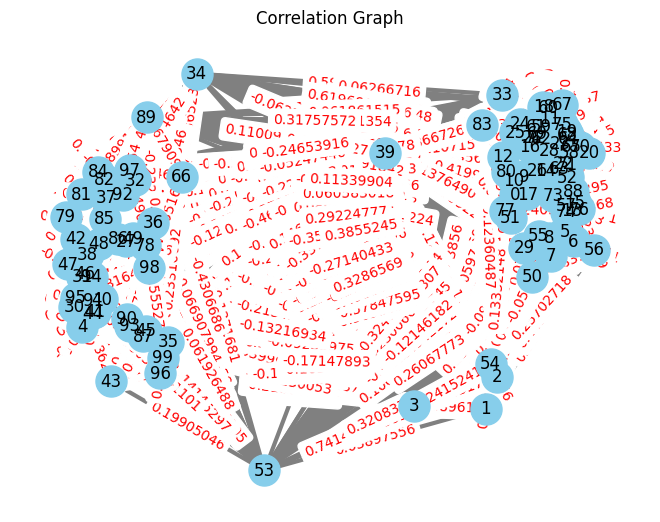

In [21]:
# Draw the graph
pos = nx.spring_layout(G)  # Layout algorithm
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=500, edge_color='gray', width=3, font_size=12, font_color='black')

# Draw edge labels (correlation values)
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# Show the graph
plt.title("Correlation Graph")
plt.show()

In [22]:
# Creating a graph
# G = nx.from_numpy_array(matrix)

# Removing self-loops
G.remove_edges_from(list(nx.selfloop_edges(G)))

In [23]:

# Compute degree centrality
degree_centralities = nx.degree_centrality(G)
betweenness_centralities = nx.betweenness_centrality(G)

# Compute eigenvector centrality
eigenvector_centralities = nx.eigenvector_centrality(G)


# Print degree centrality for each node
for node, centrality in degree_centralities.items():
    print(f"Node {node}: Degree Centrality = {centrality},  Betweenness Centrality = {betweenness_centralities[node]},  Eigenvector Centrality = {eigenvector_centralities[node]}")

Node 0: Degree Centrality = 0.8484848484848485,  Betweenness Centrality = 0.0010877339989224005,  Eigenvector Centrality = 0.09601633737286006
Node 1: Degree Centrality = 0.8686868686868687,  Betweenness Centrality = 0.0012640901210282318,  Eigenvector Centrality = 0.09785482473987102
Node 2: Degree Centrality = 0.8282828282828284,  Betweenness Centrality = 0.001175125293724069,  Eigenvector Centrality = 0.0931762446100555
Node 3: Degree Centrality = 0.797979797979798,  Betweenness Centrality = 0.0010173494505506114,  Eigenvector Centrality = 0.09020397040394165
Node 4: Degree Centrality = 0.797979797979798,  Betweenness Centrality = 0.0011392874864016504,  Eigenvector Centrality = 0.08954015209248542
Node 5: Degree Centrality = 0.8282828282828284,  Betweenness Centrality = 0.001024407995933227,  Eigenvector Centrality = 0.09377393201692563
Node 6: Degree Centrality = 0.8787878787878789,  Betweenness Centrality = 0.0011725718677608004,  Eigenvector Centrality = 0.09940897305733438
Node

In [24]:
# Compute clustering coefficient
clustering_coefficient = nx.clustering(G)
for node, coefficient in clustering_coefficient.items():
    print(f"Node {node}: clustering_coefficient= {coefficient}")

Node 0: clustering_coefficient= 0.8898450946643718
Node 1: clustering_coefficient= 0.8801641586867305
Node 2: clustering_coefficient= 0.8774465522433003
Node 3: clustering_coefficient= 0.884453099642973
Node 4: clustering_coefficient= 0.872444011684518
Node 5: clustering_coefficient= 0.8903944595001505
Node 6: clustering_coefficient= 0.8901363271852446
Node 7: clustering_coefficient= 0.8999044433827043
Node 8: clustering_coefficient= 0.8878958120531154
Node 9: clustering_coefficient= 0.910960916838084
Node 10: clustering_coefficient= 0.8926332288401254
Node 11: clustering_coefficient= 0.8897596656217346
Node 12: clustering_coefficient= 0.8775438596491228
Node 13: clustering_coefficient= 0.8896214896214896
Node 14: clustering_coefficient= 0.8943820224719101
Node 15: clustering_coefficient= 0.8877939529675252
Node 16: clustering_coefficient= 0.8890414092884923
Node 17: clustering_coefficient= 0.9063535079795242
Node 18: clustering_coefficient= 0.8813186813186813
Node 19: clustering_coeff

In [25]:
clustering_coefficient

{0: 0.8898450946643718,
 1: 0.8801641586867305,
 2: 0.8774465522433003,
 3: 0.884453099642973,
 4: 0.872444011684518,
 5: 0.8903944595001505,
 6: 0.8901363271852446,
 7: 0.8999044433827043,
 8: 0.8878958120531154,
 9: 0.910960916838084,
 10: 0.8926332288401254,
 11: 0.8897596656217346,
 12: 0.8775438596491228,
 13: 0.8896214896214896,
 14: 0.8943820224719101,
 15: 0.8877939529675252,
 16: 0.8890414092884923,
 17: 0.9063535079795242,
 18: 0.8813186813186813,
 19: 0.8899387129724209,
 20: 0.8896321070234113,
 21: 0.8812529219261337,
 22: 0.8967032967032967,
 23: 0.8974358974358975,
 24: 0.8931044866004215,
 25: 0.8903540903540903,
 26: 0.879151061173533,
 27: 0.8873456790123457,
 28: 0.883986562150056,
 29: 0.8824074074074074,
 30: 0.8944099378881988,
 31: 0.8873850868232891,
 32: 0.8904320987654321,
 33: 0.8940533151059467,
 34: 0.8861261261261262,
 35: 0.8857142857142857,
 36: 0.8837625979843226,
 37: 0.8906428734843286,
 38: 0.8888888888888888,
 39: 0.8941649899396378,
 40: 0.88662926

In [26]:
for j in range(num_nodes):
  if abs(correlation_matrix[0,j])>= 0.05 :
     print(j)

1
2
3
4
5
6
7
8
9
10
11
12
13
15
17
19
20
21
22
24
25
26
27
28
30
31
32
33
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
66
67
68
69
70
71
72
73
75
76
78
79
81
82
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [27]:
# Compute shortest path lengths
shortest_path_lengths = dict(nx.shortest_path_length(G))
for node, path_length in shortest_path_lengths.items():
    print(f"Node {node}: shortest path length= {path_length}")

Node 0: shortest path length= {0: 0, 1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1, 11: 1, 12: 1, 13: 1, 15: 1, 17: 1, 19: 1, 20: 1, 21: 1, 22: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 30: 1, 31: 1, 32: 1, 33: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1, 45: 1, 46: 1, 47: 1, 48: 1, 49: 1, 50: 1, 51: 1, 52: 1, 53: 1, 54: 1, 55: 1, 56: 1, 57: 1, 58: 1, 59: 1, 60: 1, 61: 1, 66: 1, 67: 1, 68: 1, 69: 1, 70: 1, 71: 1, 72: 1, 73: 1, 75: 1, 76: 1, 78: 1, 79: 1, 81: 1, 82: 1, 84: 1, 85: 1, 86: 1, 87: 1, 88: 1, 89: 1, 90: 1, 91: 1, 92: 1, 93: 1, 94: 1, 95: 1, 96: 1, 97: 1, 98: 1, 99: 1, 14: 2, 16: 2, 18: 2, 23: 2, 34: 2, 35: 2, 62: 2, 63: 2, 64: 2, 65: 2, 77: 2, 80: 2, 29: 2, 74: 2, 83: 2}
Node 1: shortest path length= {1: 0, 0: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 9: 1, 10: 1, 11: 1, 12: 1, 14: 1, 15: 1, 16: 1, 17: 1, 18: 1, 21: 1, 23: 1, 24: 1, 25: 1, 26: 1, 27: 1, 28: 1, 30: 1, 31: 1, 34: 1, 35: 1, 36: 1, 37: 1, 38: 1, 39: 1, 40: 1, 41: 1, 42: 1, 43: 1, 44: 1

In [29]:
# Compute clustering coefficient
avg_clustering_coefficient = nx.average_clustering(G)

# Compute average shortest path length
avg_shortest_path_length = nx.average_shortest_path_length(G)

# Compute small-worldness
small_worldness = avg_clustering_coefficient / avg_shortest_path_length
print("Small-worldness:", small_worldness)

Small-worldness: 0.7950127675658134


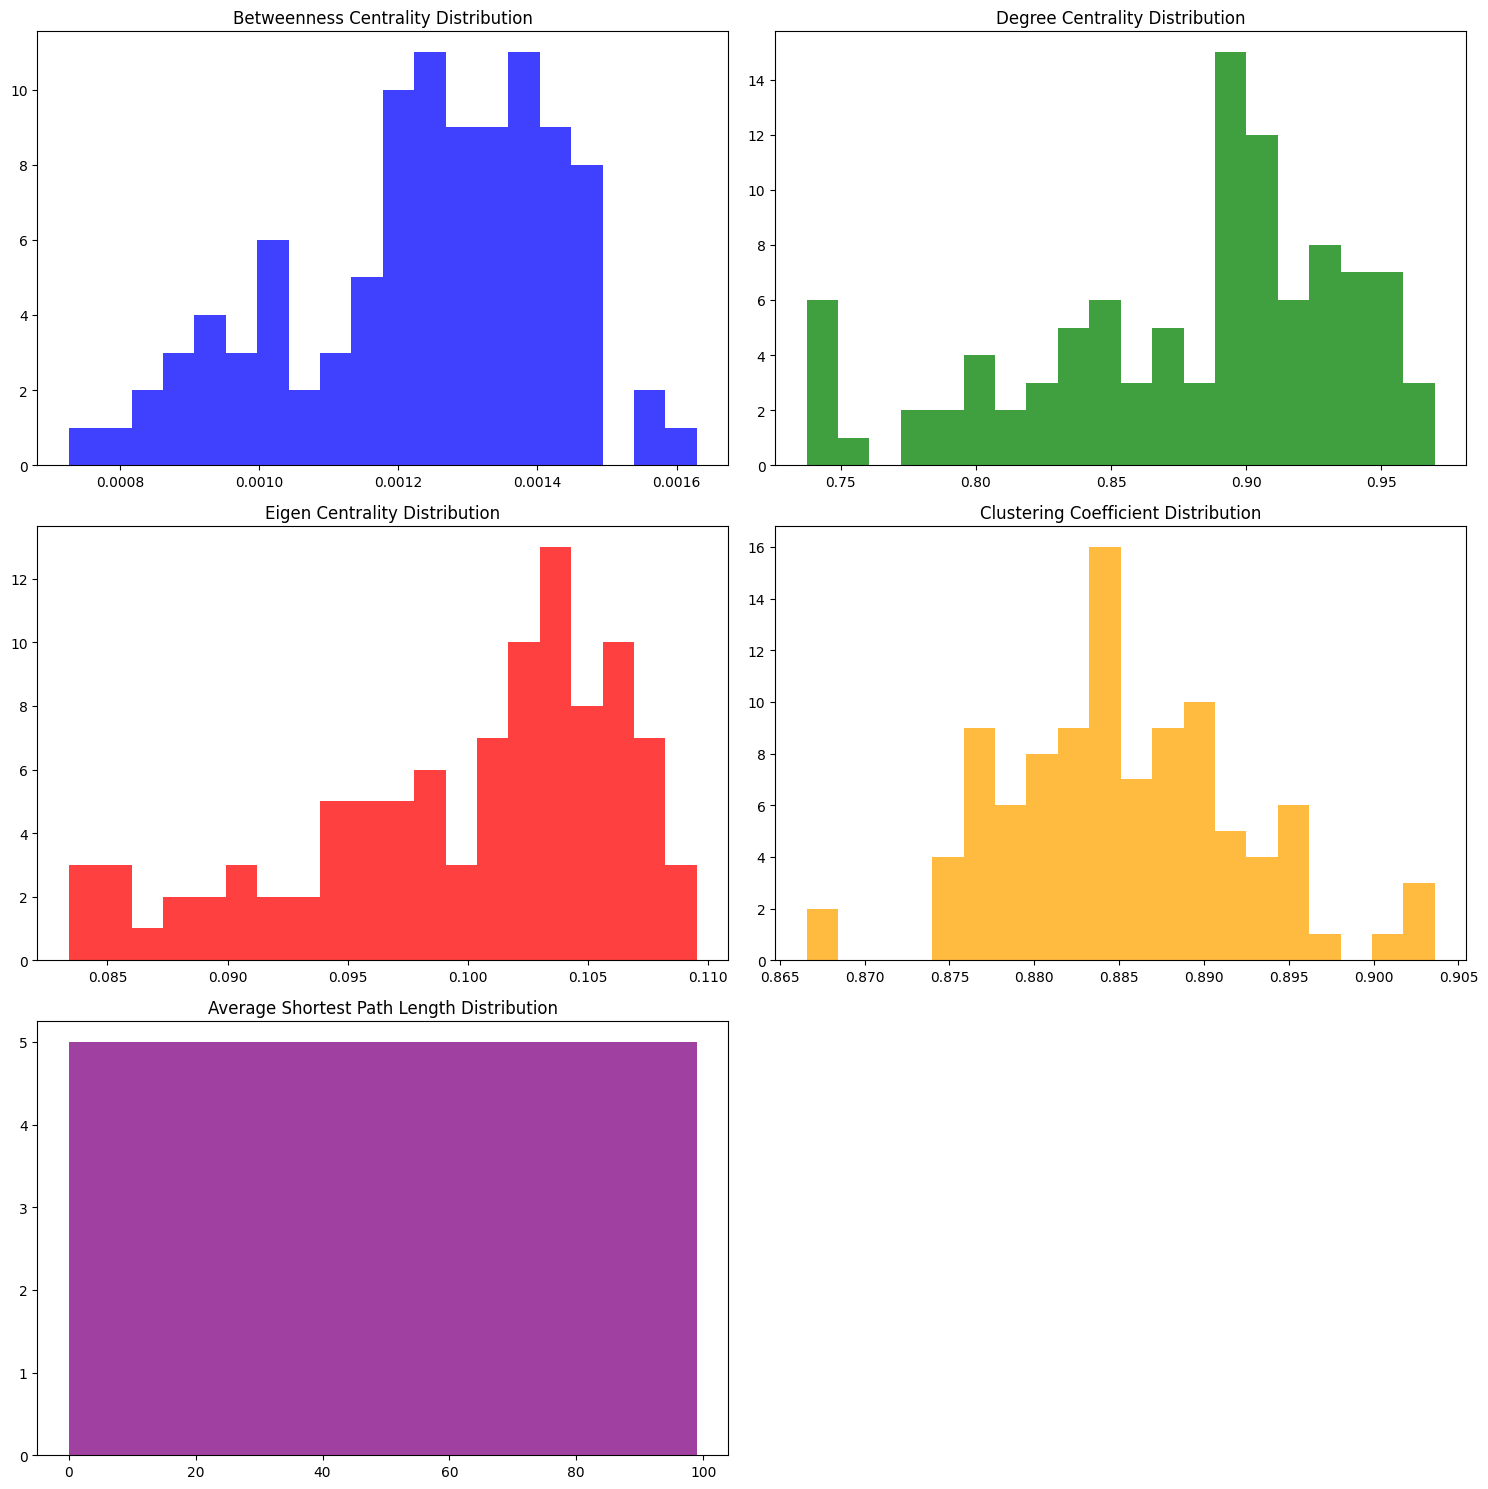

In [ ]:
import matplotlib.pyplot as plt
# Plot distributions
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Betweenness centrality distribution
axs[0, 0].hist(betweenness_centralities.values(), bins=20, alpha=0.75, color='b')
axs[0, 0].set_title('Betweenness Centrality Distribution')

# Degree centrality distribution
axs[0, 1].hist(degree_centralities.values(), bins=20, alpha=0.75, color='g')
axs[0, 1].set_title('Degree Centrality Distribution')

# Eigen centrality distribution
axs[1, 0].hist(eigenvector_centralities.values(), bins=20, alpha=0.75, color='r')
axs[1, 0].set_title('Eigen Centrality Distribution')

# Clustering coefficient distribution
axs[1, 1].hist(clustering_coefficient.values(), bins=20, alpha=0.75, color='orange')
axs[1, 1].set_title('Clustering Coefficient Distribution')

# Shortest path length distribution (average)
axs[2, 0].hist(shortest_path_lengths, bins=20, alpha=0.75, color='purple')
axs[2, 0].set_title('Average Shortest Path Length Distribution')

# Remove empty subplot
fig.delaxes(axs[2, 1])

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

<Axes: >

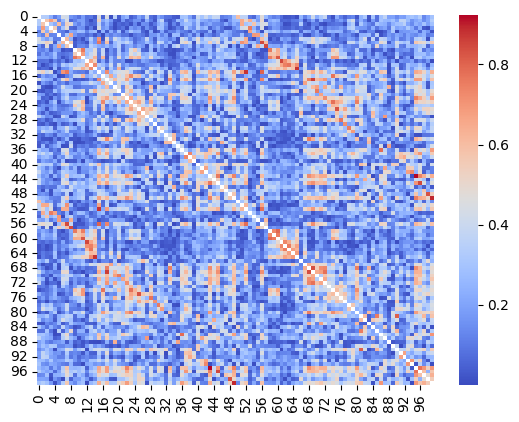

In [ ]:
# matrixdiagNaN=matrix.copy()
# np.fill_diagonal(matrixdiagNaN, np.nan)
# sns.heatmap(matrixdiagNaN,cmap='coolwarm', cbar=True, square=False)

In [ ]:
# # Create graphs for comparison
# matrix2 = matrix.copy()
# matrix3 = matrix.copy()
# # Create sparser graphs
# matrix2[matrix2<=0.005] = 0
# matrix3[matrix3<=0.75] = 0

# st50G = nx.from_numpy_array(matrix2)
# st25G = nx.from_numpy_array(matrix3)

# st50G.remove_edges_from(list(nx.selfloop_edges(st50G)))
# st25G.remove_edges_from(list(nx.selfloop_edges(st25G)))

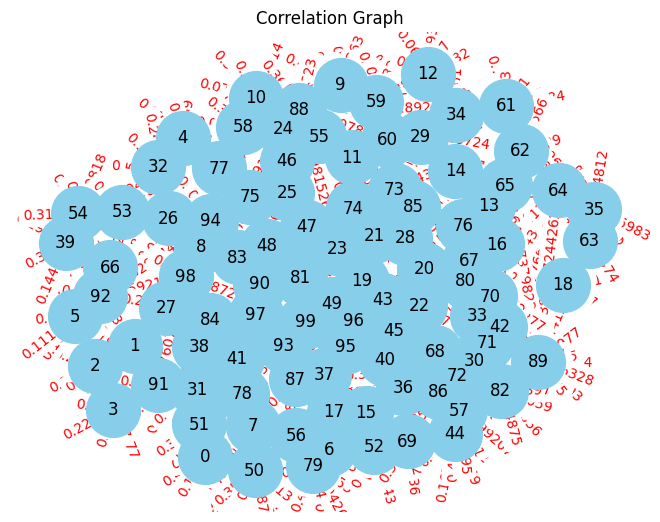

In [ ]:
# # Draw the graph
# pos = nx.spring_layout(G)  # Layout algorithm
# nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='gray', width=3, font_size=12, font_color='black')

# # Draw edge labels (correlation values)
# edge_labels = nx.get_edge_attributes(G, 'weight')
# nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

# # Show the graph
# plt.title("Correlation Graph")
# plt.show()